In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.version.version

'1.20.1'

In [1]:
# Import pandas 
import pandas as pd 
  
# Read csv file  
table = pd.read_json("../raw/usa_with_details.json") 
# Print it out if you want to...
print(table.head(1))

    a  co             c       d      p       s  si      ssi  stt  st  ...  \
0 NaN NaN  Apr 13, 2021  1597.0  62221  491600   0  JYACCDY    8 NaN  ...   

  SearchError  ScamTitle              BusinessName             C       D  \
0                         Pay To Drive Advertising  Apr 13, 2021  1597.0   

                                         Description      P     PKID  S  \
0  I received an email from this company asking i...  62221  JYACCDY  8   

   ScamID  
0  491600  

[1 rows x 24 columns]


# Textual Analysis

In [14]:
# collect sentiment
from textblob import TextBlob
_dict = {"Sentiment":[]}
for i in range(table.shape[0]):
    _dict["Sentiment"].append(TextBlob(str(table["Description"][i])).sentiment.polarity)
    

In [15]:
from statistics import mean 
mean(_dict["Sentiment"])
#chatter plot

0.06279141221545582

In [16]:
import nltk
money = []
for i in range(table.shape[0]):
    money.append(table['d'][i]) 
sum(money)

12617412.149999993

In [17]:
from rake_nltk import Rake
_dict["Keywords"] = []

for i in range(table.shape[0]- 300):
    r = Rake()
    r.extract_keywords_from_text(str(table["Description"][i]))
    
    keywords = r.get_ranked_phrases()
    if not len(keywords):
        keyword = ""
    else:
        keyword = keywords[0]
    _dict["Keywords"].append (keyword)


In [18]:
fd = nltk.FreqDist(_dict["Keywords"])

In [19]:
fd.most_common(10)

[('currently hiring 23 people', 51),
 ('social security number', 47),
 ('secret shopper', 27),
 ('web store jobs dot org', 27),
 ('interview via google hangouts', 19),
 ('hiring 23 people', 19),
 ('17 -$ 32 hr', 17),
 ('never got paid', 16),
 ('buy gift cards', 15),
 ('secret shopper job', 14)]

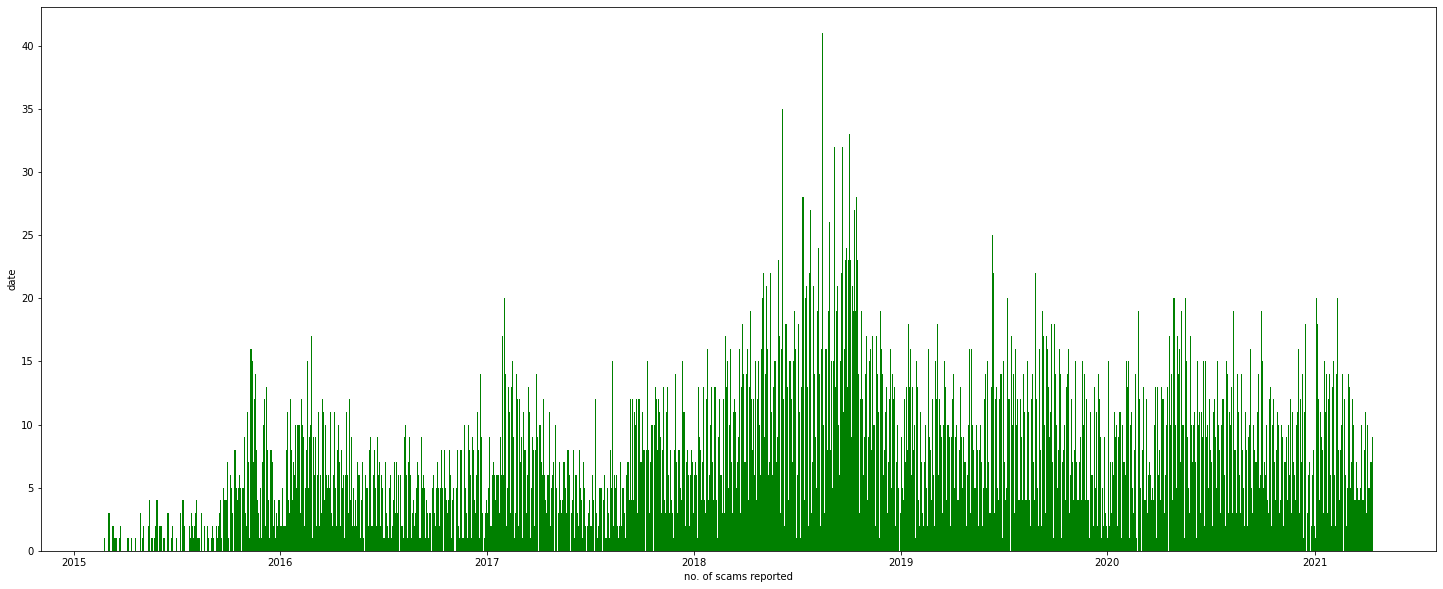

In [20]:
#time
_dict["time"] = {}
import datetime
import dateutil.parser
yourdate = dateutil.parser.parse(str(table["c"][0]))
_dict["time"][yourdate] = 1
for i in range(1,table.shape[0]):
    new_Date = dateutil.parser.parse(str(table["c"][i]))
    if new_Date != yourdate : 
        _dict["time"][new_Date] = 1
    else:
        _dict["time"][new_Date] += 1
    yourdate = new_Date
a = list(_dict["time"].keys()) 
b = list(_dict["time"].values()) 
   

fig = plt.figure(figsize = (25, 10
                           )) 
  
plt.bar(a, b, color ='green',  
        width = 1) 
  
plt.xlabel("no. of scams reported") 
plt.ylabel("date")  
plt.show() 
  

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'float'

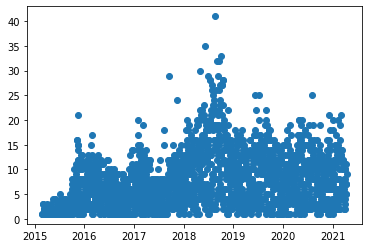

In [29]:
import pylab
pylab. plot(a,b,'o')
z = np. polyfit(a, b, 1)
p = np. poly1d(z)
pylab. plot(x,p(x),"r--")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

## top 20 days with most no.of scams reported
- Aug 16, 2018 -- amazon webstore 
- Jun 06, 2018 -- meridex systems
- Oct 03, 2018 -- amazonprofits

In [17]:
from heapq import nlargest 
res = nlargest(20, _dict["time"], key = _dict["time"].get) 
for i in res:
    print(f'{i}      {_dict["time"][i]}')

2018-08-16 00:00:00      41
2018-06-06 00:00:00      35
2018-10-03 00:00:00      33
2018-09-20 00:00:00      32
2018-09-06 00:00:00      32
2018-05-01 00:00:00      30
2018-09-12 00:00:00      29
2018-06-27 00:00:00      29
2017-09-12 00:00:00      29
2018-10-16 00:00:00      28
2018-10-15 00:00:00      28
2018-07-13 00:00:00      28
2018-07-12 00:00:00      28
2018-10-11 00:00:00      27
2018-10-09 00:00:00      27
2018-10-02 00:00:00      27
2018-09-28 00:00:00      27
2018-07-26 00:00:00      27
2018-09-18 00:00:00      26
2018-08-28 00:00:00      26


## the rise in number of scam reports in the later part of 2018 can be associated with a lot of imposters using the name <b>amazon /webstore</b>

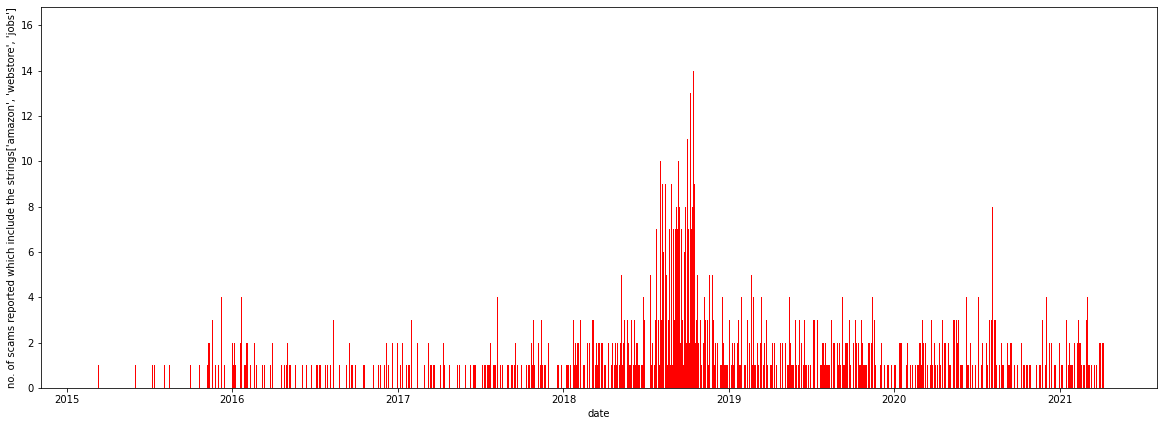

In [31]:
#descriptions with special strings
strings = ["amazon","webstore","jobs" ]
_dict["timeVstrings"] = {}
import datetime
import dateutil.parser

yourdate = dateutil.parser.parse(str(table["c"][0]))
_dict["timeVstrings"][yourdate] = 0
for i in range(1,table.shape[0]):
    new_Date = dateutil.parser.parse(str(table["c"][i]))
    if new_Date != yourdate :
        _dict["timeVstrings"][new_Date] = 0
    if any(phrase in str(table["Description"][i]).lower() for phrase in strings):
        _dict["timeVstrings"][new_Date] += 1
    yourdate = new_Date

courses = list(_dict["timeVstrings"].keys()) 
values = list(_dict["timeVstrings"].values()) 
   

fig = plt.figure(figsize = (20, 7)) 
  
plt.bar(courses, values, color ='red',  
        width = 1) 
  
plt.ylabel("no. of scams reported which include the strings"+str(strings)) 
plt.xlabel("date")  
plt.show() 
  

In [32]:
import nltk

In [33]:
import nltk, re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [34]:
def getFreqForYear(year):
    _dict["raw"+str(year)] = ""
    for i in range(table.shape[0]):
        yourdate = dateutil.parser.parse(str(table["c"][i]))
        if yourdate.year < year :
            break
        elif yourdate.year == year:
            _dict["raw"+str(year)]+=(str(table["Description"][i]))

    # Regex for only english terms (with dots)
    ENGLISH_RE = re.compile(r'[a-z]+')

    tokens = nltk.word_tokenize(_dict["raw"+str(year)])
    lmtzr = nltk.WordNetLemmatizer()
    # Save the list between tokens
    lemmatized = []
    for word in tokens:
        # Lowerize for correct use in stopwords etc
        w = word.lower()
        # Check english terms
        if not ENGLISH_RE.match(w):
            continue
        # Check stopwords
        if w in stopwords.words('english'):
            continue
        lemmatized.append(lmtzr.lemmatize(w))

    fdist1 = nltk.FreqDist(lemmatized)
    print(fdist1.most_common(10))

In [35]:
getFreqForYear(2021)

[('job', 983), ('company', 979), ('would', 874), ('email', 844), ('check', 814), ('interview', 593), ('sent', 483), ('work', 442), ('received', 438), ('asked', 437)]


In [63]:
getFreqForYear(2020)

[('job', 3701), ('company', 3645), ('check', 3520), ('email', 3428), ('would', 2839), ('interview', 1808), ('work', 1775), ('sent', 1731), ('position', 1700), ('received', 1692)]


In [47]:
getFreqForYear(2019)

[('check', 4102), ('company', 3803), ('job', 3623), ('email', 3535), ('would', 3097), ('position', 1873), ('work', 1863), ('received', 1860), ('interview', 1755), ('sent', 1711)]


In [42]:
getFreqForYear(2018)

[('company', 4944), ('job', 4799), ('check', 4692), ('email', 4372), ('would', 3623), ('work', 2644), ('position', 2409), ('received', 2401), ('name', 2106), ('get', 2019)]


In [43]:
getFreqForYear(2017)

[('job', 2652), ('company', 2648), ('check', 2432), ('email', 2292), ('would', 2078), ('work', 1341), ('position', 1311), ('name', 1259), ('received', 1214), ('interview', 1196)]
